# アヤメの分析

## フィッシャーのアヤメ

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

- [Iris setosa - Wikipedia](https://en.wikipedia.org/wiki/Iris_setosa)
- [Iris virgicolor - Wikipedia](https://en.wikipedia.org/wiki/Iris_versicolor)
- [Iris virginica - Wikipedia](https://en.wikipedia.org/wiki/Iris_virginica)

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

### 【問題1】データの取得

irisデータセット読み込みましょう。

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

目的変数も同様にyに格納してください。

`X =`

|　| sepal_length | sepal_width | petal_length | petal_width |
:---:|:---:|:---:|:---:|:---:
|**0**| 5.1 | 3.5 | 1.4 | 0.2 |
|**1**| 4.9 | 3.0 | 1.3 | 0.2 |
|**2**| 4.7 | 3.2 | 1.3 | 0.2 |
|**3**| 4.6 | 3.1 | 1.5 | 0.2 |
|：|：|：|：|:|

目的変数も同様に`y`に格納してください。

`y =`

|　| Species |
:---:|:---:
|**0**| 0 |
|**1**| 0 |
|**2**| 0 |
|**3**| 0 |
|：|：|

In [2]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
display(X)
display(y)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### 【問題2】データの結合

問題1で準備した`X,y`を結合させたDataFrame型変数`df`を作成してください。結合することで扱いやすくなります。これ以降はこの`df`を使っていきます。

`df =`

|　| sepal_length | sepal_width | petal_length | petal_width | Species |
:---:|:---:|:---:|:---:|:---:|:---:
**0**| 5.1 | 3.5 | 1.4 | 0.2 | 0
**1**| 4.9 | 3.0 | 1.3 | 0.2 | 0
**2**| 4.7 | 3.2 | 1.3 | 0.2 | 0
**3**| 4.6 | 3.1 | 1.5 | 0.2 | 0
|:|：|：|：|：|:|

In [5]:
df = pd.concat([X, y], axis=1)
display(df)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 【問題3】データの確認


今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

- 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
- ラベルごとのサンプル数の合計を出力する。
- 特徴量に欠損値があるかを確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

`.head()`,`.info()`,`.describe()`,`.count()`,`.isnull()`,`.sum()`などのPandasのメソッドを使ってみましょう。

- ①先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

In [6]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**[各特徴量の特徴]**

小数点以下1桁の浮動小数点数である。

- **ラベルごとのサンプル数の合計を出力する。**

In [7]:
#label_0 = df['Species']==0
#label_1 = df['Species']==1
#abel_2 = df['Species']==2

display(df["Species"].value_counts())

display(df.Species.value_counts())

2    50
1    50
0    50
Name: Species, dtype: int64

2    50
1    50
0    50
Name: Species, dtype: int64

- **特徴量に欠損値があるかを確認する。**

In [8]:
#データフレームの情報を得る
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**→Species以外の各ラベルはnon-null(欠損値無し)の浮動小数点数である**

In [9]:
#別解
df.isnull().sum(axis = 0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

- **特徴量の平均値と標準偏差、四分位数を一度に表示させる。**

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 【問題4】irisデータセット自体の調査

アヤメの種類は3種類である。
- **セトナ(setosa)**

[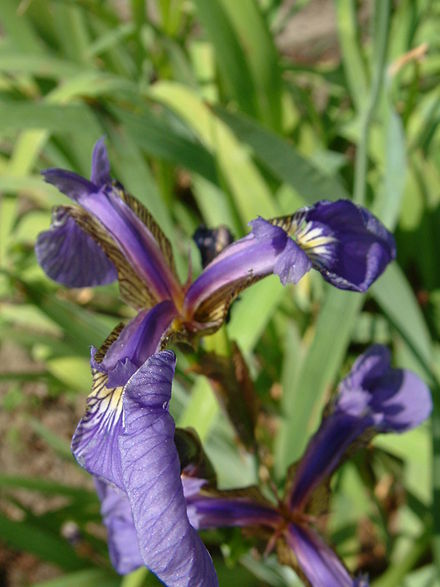](https://en.wikipedia.org/wiki/Iris_setosa)


- **バーシクル(versicolor)**
[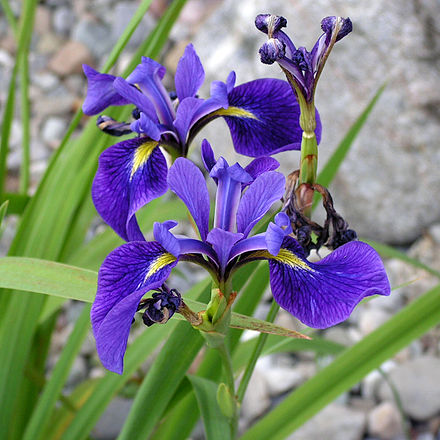](https://en.wikipedia.org/wiki/Iris_versicolor)


- **バージニカ(virginica)**
[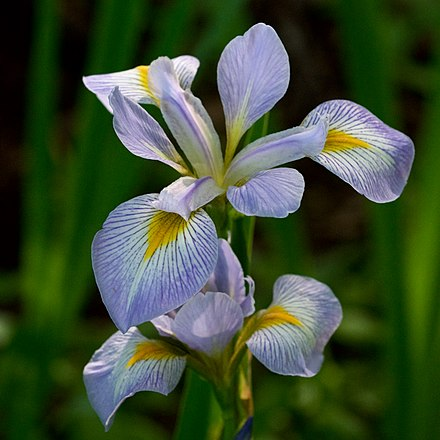](https://en.wikipedia.org/wiki/Iris_virginica)


- **for iris**
[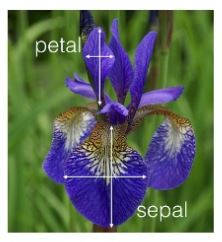](https://en.wikipedia.org/wiki/Iris_(plant))

### 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

- `sepal_width`の列を３つの異なる方法で抽出する
- `50番目から99番目まで`のデータを抽出する
- `petal_length`の列の`50番目から99番目まで`のデータを抽出する
- `petal_width`の値が`0.2`のデータを抽出する

`.loc`や`.iloc`を使うことになります。この２つはどう違うのかについて説明してください。

- **sepal_widthの列を３つの異なる方法で抽出する**

In [11]:
display(df.sepal_width.head())

display(df.loc[:, "sepal_width"].head())#二次元配列の列名指定

display(df.iloc[:, 1].head())#二次元配列の列のインデックス指定

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

- **50番目から99番目までのデータを抽出する**

In [12]:
display(df[50:100])

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


- **petal_lengthの列の50番目から99番目までのデータを抽出する**

In [13]:
display(df.petal_length[50:100])

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

 **上記を`.loc`、及び`.iloc`を使用して表記した場合**
 
- locは行をインデックスで指定する

　　`df.loc[行インデックス, 列名]`

In [14]:
#locの場合
display(df.loc[50:100, "petal_length"])

50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal_length, dtype: float64

 - ilocは行を番号で指定する

　　`df.iloc[行番号, 列番号]`

In [15]:
display(df.iloc[50:100, 2])

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

- **petal_widthの値が0.2のデータを抽出する**

In [16]:
display(df[df['petal_width']==0.2])

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


### 【問題6】図の作成

データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

- ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
- 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
- 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

- **ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）**

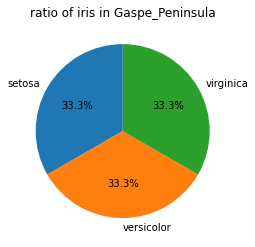

In [17]:
iris_label_data = df['Species'].value_counts()#ラベルごとのサンプルの合計
label = ["setosa", "versicolor", "virginica"]
plt.title("ratio of iris in Gaspe_Peninsula")
plt.pie(iris_label_data, labels=label, startangle=90, autopct="%1.1f%%")
plt.show()

- **特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する**

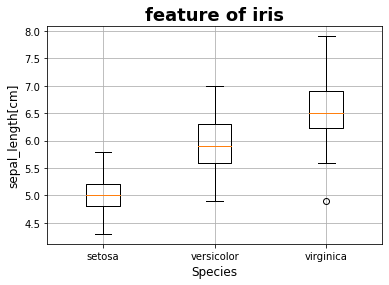

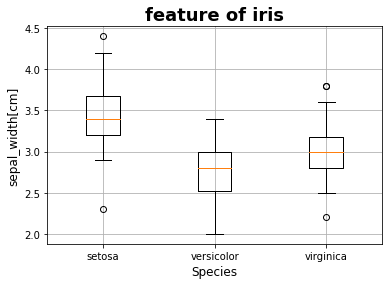

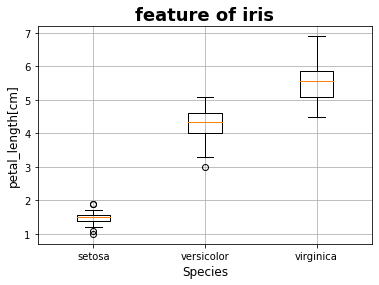

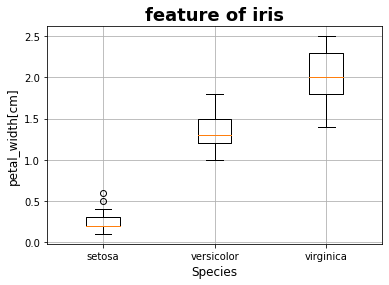

In [48]:
feature = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i in feature:
    plt.boxplot([df[df["Species"]==0][i], df[df["Species"]==1][i], df[df["Species"]==2][i]])
    plt.title("feature of iris", size=18, weight='heavy')
    plt.xlabel("Species", size=12)
    plt.xticks([1, 2, 3], label)
    plt.grid(True)
    plt.ylabel("{}[cm]".format(i), size=12)
    plt.show()

- **特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する**

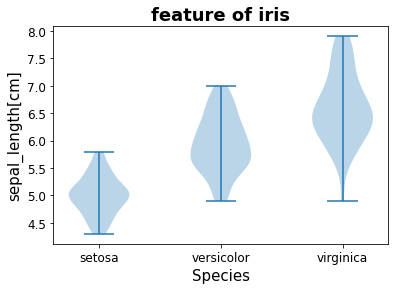

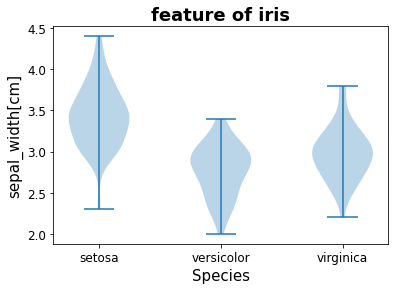

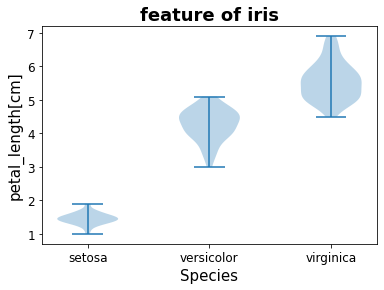

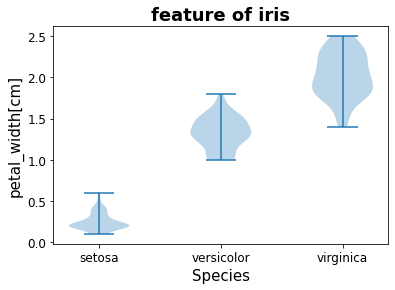

In [56]:
feature = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for i in feature:
    plt.violinplot([df[df["Species"]==0][i], df[df["Species"]==1][i], df[df["Species"]==2][i]])
    plt.title("feature of iris", size=18, weight='heavy')
    plt.xlabel("Species", size=15)
    plt.xticks([1, 2, 3], label)
    plt.tick_params(labelsize=12)
    plt.ylabel("{}[cm]".format(i), size=15)
    plt.show()

**箱ひげ図は四分位や中央値がわかりやすいが、分布は見にくい。**

**バイオリン図は分布は見やすいが、四分位や中央値がわかりにくい。**

### 【問題7】特徴量間の関係の確認

特徴量間の関係を見ていきます。次の4つを行ってください。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)
- 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る(１つ)
- ４つの特徴量に関する相関係数行列を作る
- 相関係数行列のヒートマップを作る(１つ)

相関係数行列はDataFrameの`corr()`メソッドを使うことで求められます。

- 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る(６つ)

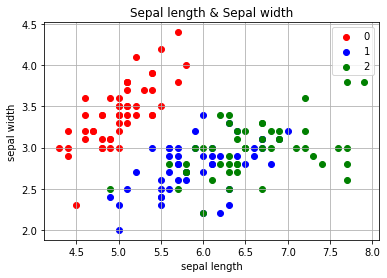

In [60]:
x_0 = df[df.Species==0].iloc[:, 0]# sepal lengthでラベル０
x_1 = df[df.Species==1].iloc[:, 0]# sepal lengthでラベル1
x_2 = df[df.Species==2].iloc[:, 0]# sepal lengthでラベル2

y_0 = df[df.Species==0].iloc[:, 1]# sepal widthでラベル０
y_1 = df[df.Species==1].iloc[:, 1]# sepal widthでラベル1
y_2 = df[df.Species==2].iloc[:, 1]# sepal widthでラベル2

# 散布図を描画
plt.title("Sepal length & Sepal width")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.grid (True)
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_1, c='blue')
plt.scatter(x_2, y_2, c='green')
plt.legend([0, 1, 2])
plt.show()

- ４つの特徴量に関する相関係数行列を作る

In [24]:
df.iloc[:, :4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- 相関係数行列のヒートマップを作る(１つ)

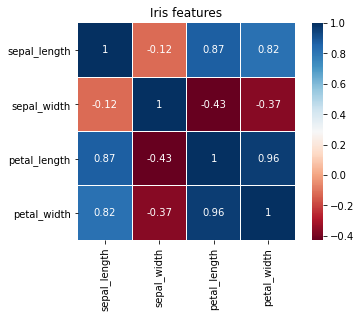

In [44]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.title("Iris features")
sns.heatmap(df.iloc[:, :4].corr(), cmap=colormap, square=True, annot=True, 
            linecolor='white', linewidths=0.1)
plt.show()

**考察**

petal-widthとpetal_lengthに強い相関関係が見られる。
またpetal_lengthとsepal_lengthにも上記ほどではないが、相関関係が見られる。
また下記の散布図を作成したら、その中でも特にsetosaというアヤメはこれらの特徴量からの分類できる可能性が大きいと考えられる

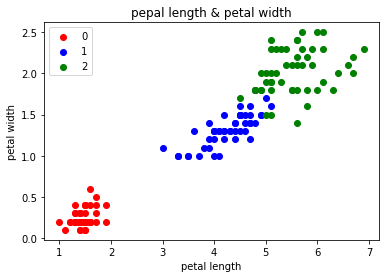

In [65]:
x_3 = df[df.Species==0].iloc[:, 2]# petal lengthでラベル０
x_4 = df[df.Species==1].iloc[:, 2]# petal lengthでラベル1
x_5 = df[df.Species==2].iloc[:, 2]# petal lengthでラベル2

y_3 = df[df.Species==0].iloc[:, 3]# petal widthでラベル０
y_4 = df[df.Species==1].iloc[:, 3]# petal widthでラベル1
y_5 = df[df.Species==2].iloc[:, 3]# petal widthでラベル2

plt.title("pepal length & petal width")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.scatter(x_3, y_3, c='red')
plt.scatter(x_4, y_4, c='blue')
plt.scatter(x_5, y_5, c='green')
plt.legend([0, 1, 2])

In [ ]:
#散布図行列の作り方

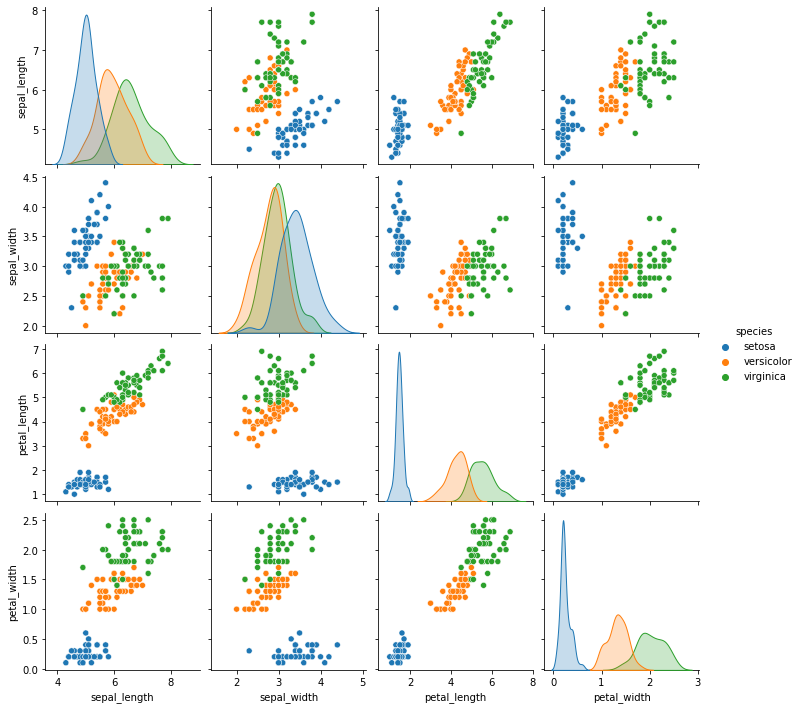

In [27]:
import seaborn
iris = seaborn.load_dataset( "iris" )
seaborn.pairplot( iris, hue="species" )
plt.show()

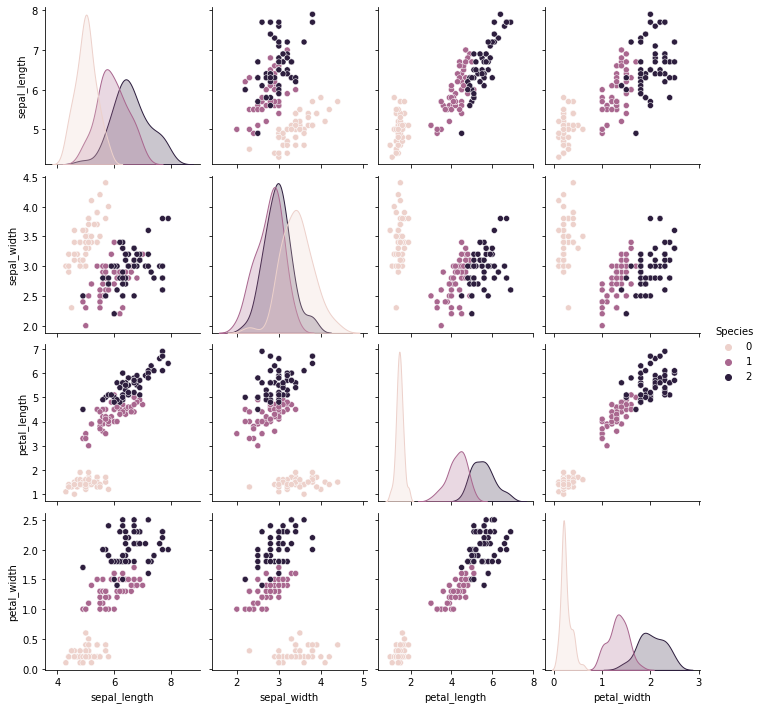

In [31]:
import seaborn as sns
sns.pairplot(df, hue='Species')